In [65]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [16]:
#Cargar los datos
mnist = fetch_openml('mnist_784', as_frame = False)
X_mnist = mnist.data
y_mnist = mnist.target

In [17]:
y_mnist[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

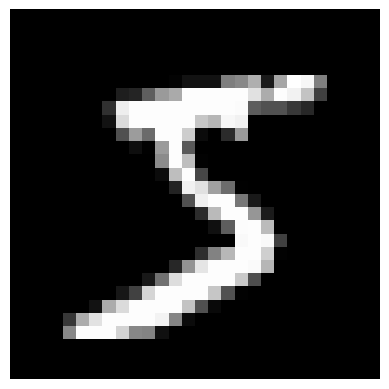

In [15]:
# Visualización de la primera imagen del dataset.
plt.axis('off')
plt.imshow(mnist.data[0].reshape(28,28), cmap = 'gray');

In [ ]:
#Preprocesamiento de los datos

In [19]:
#1. Normalización de los píxeles
X_mnist = X_mnist.astype('float')/255.0
print(X_mnist)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
#2. Conversión de etiquetas con One Hot Encoding
lb = LabelBinarizer()
y_mnist = lb.fit_transform(y_mnist)
print(y_mnist)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [46]:
#3. División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

In [ ]:
# Modelo simple 

In [61]:
oculta1 = tf.keras.layers.Dense(units=128, activation='relu', input_shape=[784])
oculta2 = tf.keras.layers.Dense(units=64, activation='relu')
salida = tf.keras.layers.Dense(units=10, activation='softmax')

modelo = tf.keras.Sequential([oculta1,oculta2,salida])

In [62]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'categorical_crossentropy',
    metrics= ['accuracy']
)

In [63]:
print("comenzando entrenamiento")
historial = modelo.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)
print("Modelo entrenado!")

comenzando entrenamiento
Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5715 - loss: 1.1854 - val_accuracy: 0.8645 - val_loss: 0.4441
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8680 - loss: 0.4440 - val_accuracy: 0.8684 - val_loss: 0.4236
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8857 - loss: 0.3832 - val_accuracy: 0.8977 - val_loss: 0.3554
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8896 - loss: 0.3660 - val_accuracy: 0.8896 - val_loss: 0.3827
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8934 - loss: 0.3588 - val_accuracy: 0.9059 - val_loss: 0.3302
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8995 - loss: 0.3353 - val_accuracy: 0.9048 - val_loss: 0.3369
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9031 - loss: 0.3259 - val_accuracy: 0.9087 - val_loss: 0.3132
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.9028 - loss

In [64]:
test_loss, test_accuracy = modelo.evaluate(X_test, y_test)
print(f"Accuracy en el conjunto de prueba: {test_accuracy:.4f}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.9061 - loss: 0.3395
Accuracy en el conjunto de prueba: 0.9062


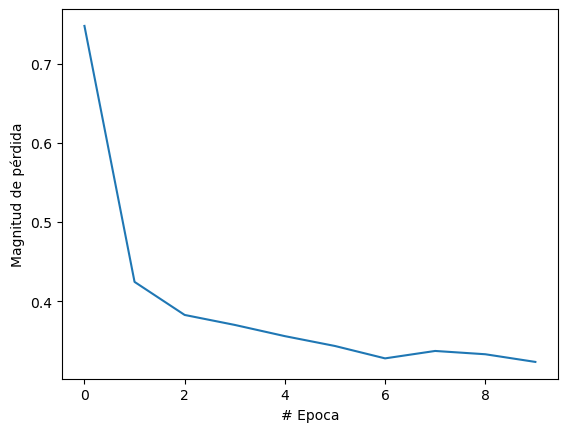

In [66]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

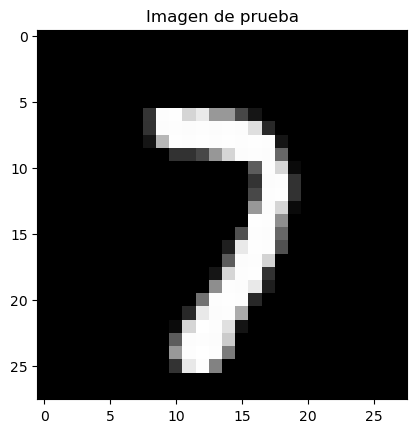

In [87]:
#Predicción
index = 3
imagen_prueba = X_test[index]

plt.imshow(imagen_prueba.reshape(28, 28), cmap='gray')
plt.title("Imagen de prueba")
plt.show()

In [88]:
imagen_prueba = imagen_prueba.reshape(1,784)
prediccion = modelo.predict(imagen_prueba)
numero_predicho = np.argmax(prediccion)
print(f"La red neuronal predice que esta imagen es un: {numero_predicho}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
La red neuronal predice que esta imagen es un: 7
